In [1]:
from __future__ import absolute_import, division, print_function

import pathlib

import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.12.0


In [97]:
dataset_path = r'/home/sippycups/Programming/PycharmProjects/live_lines/data/nba (copy).csv'
header_names = ['a_team', 'h_team', 'game_id', 'a_pts', 'h_pts', 'secs', 'status', 'a_win', 'h_win', 'last_mod_to_start', 'num_markets', 'a_odds_ml', 'h_odds_ml', 'a_hcap_tot', 'h_hcap_tot']
df = pd.read_csv(dataset_path,  dtype={'a_team':'category','h_team':'category', 'game_id':'category'})
df = pd.get_dummies(data=df, columns=['a_team', 'h_team'])
df = df.drop(['sport', 'league', 'game_id', 'last_mod_score'], axis = 1)
df.shape

(19173, 69)

In [98]:
df_copy = df.copy()
X = df_copy
xtr = X.sample(frac=0.7,random_state=0)
xte = X.drop(xtr.index)

In [99]:
# # xte[['a_odds_ml']]
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# sns_plot = sns.pairplot(xtr[['a_pts', 'h_pts', 'secs', 'last_mod_to_start', 'num_markets', 'a_odds_ml', 'h_odds_ml', 'a_hcap_tot', 'h_hcap_tot']])
# sns_plot.savefig("/home/sippycups/Programming/tensorflow/visuals/output_many_1_25_19.png")

In [100]:
xtr_stats = xtr.describe(include='all')
xtr_stats.pop('a_odds_ml')
xtr_stats = xtr_stats.transpose()
ytr = xtr.pop('a_odds_ml')
yte = xte.pop('a_odds_ml')
# xtr_stats['mean']

In [101]:
def norm(x):
  return (x - xtr_stats['mean']) / xtr_stats['std']

In [102]:
nxtr = norm(xtr)
nxte = norm(xte)

In [103]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(xtr.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),  
    layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [104]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4416      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [105]:
example_batch = nxtr[:10]
example_result = model.predict(example_batch)

In [106]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [107]:
EPOCHS = 500

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=250)

history = model.fit(nxtr, ytr.values.ravel(), epochs=EPOCHS,
                    validation_split = 0.3, verbose=1, callbacks=[early_stop, PrintDot()])

Train on 9394 samples, validate on 4027 samples
Epoch 1/500
9394/9394 [==============================] - 0s 48us/step - loss: 1130965.6697 - mean_absolute_error: 342.9568 - mean_squared_error: 1130965.6697 - val_loss: 619319.2640 - val_mean_absolute_error: 197.1908 - val_mean_squared_error: 619319.2640
Epoch 2/500
9394/9394 [==============================] - 0s 31us/step - loss: 290470.4341 - mean_absolute_error: 180.5309 - mean_squared_error: 290470.4341 - val_loss: 222338.7360 - val_mean_absolute_error: 191.0636 - val_mean_squared_error: 222338.7360
Epoch 3/500
9394/9394 [==============================] - 0s 31us/step - loss: 158944.3564 - mean_absolute_error: 167.4830 - mean_squared_error: 158944.3564 - val_loss: 247030.2677 - val_mean_absolute_error: 276.8997 - val_mean_squared_error: 247030.2677
Epoch 4/500
9394/9394 [==============================] - 0s 33us/step - loss: 134996.1756 - mean_absolute_error: 152.4817 - mean_squared_error: 134996.1756 - val_loss: 135200.7191 - val_me

Epoch 33/500
9394/9394 [==============================] - 0s 31us/step - loss: 26300.9097 - mean_absolute_error: 50.6291 - mean_squared_error: 26300.9097 - val_loss: 62708.3038 - val_mean_absolute_error: 56.1596 - val_mean_squared_error: 62708.3038
Epoch 34/500
9394/9394 [==============================] - 0s 29us/step - loss: 26635.4221 - mean_absolute_error: 51.4066 - mean_squared_error: 26635.4221 - val_loss: 49659.8074 - val_mean_absolute_error: 46.6165 - val_mean_squared_error: 49659.8074
Epoch 35/500
9394/9394 [==============================] - 0s 29us/step - loss: 23935.8031 - mean_absolute_error: 48.4754 - mean_squared_error: 23935.8031 - val_loss: 119881.1990 - val_mean_absolute_error: 88.2296 - val_mean_squared_error: 119881.1990
Epoch 36/500
9394/9394 [==============================] - 0s 29us/step - loss: 23283.0232 - mean_absolute_error: 48.6343 - mean_squared_error: 23283.0232 - val_loss: 71372.1837 - val_mean_absolute_error: 91.7801 - val_mean_squared_error: 71372.1837
Ep

Epoch 66/500
9394/9394 [==============================] - 0s 29us/step - loss: 18171.2409 - mean_absolute_error: 32.9029 - mean_squared_error: 18171.2409 - val_loss: 41749.8960 - val_mean_absolute_error: 40.8854 - val_mean_squared_error: 41749.8960
Epoch 67/500
9394/9394 [==============================] - 0s 29us/step - loss: 17293.6737 - mean_absolute_error: 33.8000 - mean_squared_error: 17293.6737 - val_loss: 57073.5588 - val_mean_absolute_error: 35.5113 - val_mean_squared_error: 57073.5588
Epoch 68/500
9394/9394 [==============================] - 0s 28us/step - loss: 15069.4298 - mean_absolute_error: 32.2348 - mean_squared_error: 15069.4298 - val_loss: 44806.3949 - val_mean_absolute_error: 35.7056 - val_mean_squared_error: 44806.3949
Epoch 69/500
9394/9394 [==============================] - 0s 28us/step - loss: 15115.6045 - mean_absolute_error: 32.0637 - mean_squared_error: 15115.6045 - val_loss: 51254.4170 - val_mean_absolute_error: 40.3491 - val_mean_squared_error: 51254.4170
Epoc

Epoch 99/500
9394/9394 [==============================] - 0s 29us/step - loss: 12633.7717 - mean_absolute_error: 27.0527 - mean_squared_error: 12633.7717 - val_loss: 42269.7646 - val_mean_absolute_error: 33.3610 - val_mean_squared_error: 42269.7646
Epoch 100/500
9394/9394 [==============================] - 0s 29us/step - loss: 11393.4513 - mean_absolute_error: 27.7844 - mean_squared_error: 11393.4513 - val_loss: 35640.6895 - val_mean_absolute_error: 30.6933 - val_mean_squared_error: 35640.6895
Epoch 101/500
9394/9394 [==============================] - 0s 29us/step - loss: 9667.1702 - mean_absolute_error: 26.9821 - mean_squared_error: 9667.1702 - val_loss: 53777.5374 - val_mean_absolute_error: 37.5047 - val_mean_squared_error: 53777.5374
Epoch 102/500
9394/9394 [==============================] - 0s 30us/step - loss: 10367.3570 - mean_absolute_error: 28.2031 - mean_squared_error: 10367.3570 - val_loss: 30481.2841 - val_mean_absolute_error: 34.6750 - val_mean_squared_error: 30481.2841
Epo

9394/9394 [==============================] - 0s 29us/step - loss: 10061.6754 - mean_absolute_error: 23.7006 - mean_squared_error: 10061.6754 - val_loss: 32802.5936 - val_mean_absolute_error: 34.4845 - val_mean_squared_error: 32802.5936
Epoch 132/500
9394/9394 [==============================] - 0s 31us/step - loss: 9089.0702 - mean_absolute_error: 24.4574 - mean_squared_error: 9089.0702 - val_loss: 33847.7594 - val_mean_absolute_error: 29.3897 - val_mean_squared_error: 33847.7594
Epoch 133/500
9394/9394 [==============================] - 0s 30us/step - loss: 8539.5844 - mean_absolute_error: 25.4221 - mean_squared_error: 8539.5844 - val_loss: 29266.3752 - val_mean_absolute_error: 24.7299 - val_mean_squared_error: 29266.3752
Epoch 134/500
9394/9394 [==============================] - 0s 29us/step - loss: 7310.8975 - mean_absolute_error: 23.3308 - mean_squared_error: 7310.8975 - val_loss: 35408.4845 - val_mean_absolute_error: 34.2118 - val_mean_squared_error: 35408.4845
Epoch 135/500
9394/9

9394/9394 [==============================] - 0s 32us/step - loss: 8886.6453 - mean_absolute_error: 22.2603 - mean_squared_error: 8886.6453 - val_loss: 28683.8732 - val_mean_absolute_error: 24.2435 - val_mean_squared_error: 28683.8732
Epoch 165/500
9394/9394 [==============================] - 0s 31us/step - loss: 7990.3413 - mean_absolute_error: 22.2928 - mean_squared_error: 7990.3413 - val_loss: 39374.6987 - val_mean_absolute_error: 48.4404 - val_mean_squared_error: 39374.6987
Epoch 166/500
9394/9394 [==============================] - 0s 35us/step - loss: 7948.9083 - mean_absolute_error: 21.8430 - mean_squared_error: 7948.9083 - val_loss: 30105.4222 - val_mean_absolute_error: 40.7417 - val_mean_squared_error: 30105.4222
Epoch 167/500
9394/9394 [==============================] - 0s 34us/step - loss: 8696.0627 - mean_absolute_error: 22.7594 - mean_squared_error: 8696.0627 - val_loss: 39542.0041 - val_mean_absolute_error: 29.3119 - val_mean_squared_error: 39542.0041
Epoch 168/500
9394/939

9394/9394 [==============================] - 0s 42us/step - loss: 8911.9909 - mean_absolute_error: 20.8151 - mean_squared_error: 8911.9909 - val_loss: 31181.7041 - val_mean_absolute_error: 24.0421 - val_mean_squared_error: 31181.7041
Epoch 198/500
9394/9394 [==============================] - 0s 31us/step - loss: 11413.1087 - mean_absolute_error: 20.3874 - mean_squared_error: 11413.1087 - val_loss: 36231.2878 - val_mean_absolute_error: 29.0399 - val_mean_squared_error: 36231.2878
Epoch 199/500
9394/9394 [==============================] - 0s 30us/step - loss: 8949.7653 - mean_absolute_error: 19.9986 - mean_squared_error: 8949.7653 - val_loss: 43684.7851 - val_mean_absolute_error: 33.6091 - val_mean_squared_error: 43684.7851
Epoch 200/500
9394/9394 [==============================] - 0s 31us/step - loss: 10671.4238 - mean_absolute_error: 20.2184 - mean_squared_error: 10671.4238 - val_loss: 41308.5949 - val_mean_absolute_error: 29.1655 - val_mean_squared_error: 41308.5949
Epoch 201/500
9394

9394/9394 [==============================] - 0s 30us/step - loss: 10737.1327 - mean_absolute_error: 19.4679 - mean_squared_error: 10737.1327 - val_loss: 35009.6782 - val_mean_absolute_error: 28.4856 - val_mean_squared_error: 35009.6782
Epoch 230/500
9394/9394 [==============================] - 0s 29us/step - loss: 10869.4334 - mean_absolute_error: 19.0692 - mean_squared_error: 10869.4334 - val_loss: 36874.9393 - val_mean_absolute_error: 23.9824 - val_mean_squared_error: 36874.9393
Epoch 231/500
9394/9394 [==============================] - 0s 30us/step - loss: 9740.3320 - mean_absolute_error: 18.4785 - mean_squared_error: 9740.3320 - val_loss: 36308.4535 - val_mean_absolute_error: 24.5645 - val_mean_squared_error: 36308.4535
Epoch 232/500
9394/9394 [==============================] - 0s 29us/step - loss: 9343.5681 - mean_absolute_error: 18.2848 - mean_squared_error: 9343.5681 - val_loss: 34825.3380 - val_mean_absolute_error: 28.8773 - val_mean_squared_error: 34825.3380
Epoch 233/500
9394

9394/9394 [==============================] - 0s 30us/step - loss: 9910.5936 - mean_absolute_error: 18.2473 - mean_squared_error: 9910.5936 - val_loss: 39347.0877 - val_mean_absolute_error: 22.4638 - val_mean_squared_error: 39347.0877
Epoch 263/500
9394/9394 [==============================] - 0s 30us/step - loss: 9396.5500 - mean_absolute_error: 18.7160 - mean_squared_error: 9396.5500 - val_loss: 27946.5649 - val_mean_absolute_error: 21.9956 - val_mean_squared_error: 27946.5649
Epoch 264/500
9394/9394 [==============================] - 0s 28us/step - loss: 7680.3093 - mean_absolute_error: 18.1430 - mean_squared_error: 7680.3093 - val_loss: 29601.0194 - val_mean_absolute_error: 36.8503 - val_mean_squared_error: 29601.0194
Epoch 265/500
9394/9394 [==============================] - 0s 29us/step - loss: 8041.4578 - mean_absolute_error: 18.1399 - mean_squared_error: 8041.4578 - val_loss: 37956.0549 - val_mean_absolute_error: 23.9716 - val_mean_squared_error: 37956.0549
Epoch 266/500
9394/939

9394/9394 [==============================] - 0s 29us/step - loss: 7855.5943 - mean_absolute_error: 16.8807 - mean_squared_error: 7855.5943 - val_loss: 31520.0201 - val_mean_absolute_error: 21.0213 - val_mean_squared_error: 31520.0201
Epoch 296/500
9394/9394 [==============================] - 0s 29us/step - loss: 9072.9056 - mean_absolute_error: 17.5404 - mean_squared_error: 9072.9056 - val_loss: 47006.8690 - val_mean_absolute_error: 31.5967 - val_mean_squared_error: 47006.8690
Epoch 297/500
9394/9394 [==============================] - 0s 28us/step - loss: 8070.2414 - mean_absolute_error: 16.9852 - mean_squared_error: 8070.2414 - val_loss: 36268.6571 - val_mean_absolute_error: 24.4247 - val_mean_squared_error: 36268.6571
Epoch 298/500
9394/9394 [==============================] - 0s 31us/step - loss: 9213.7649 - mean_absolute_error: 17.4232 - mean_squared_error: 9213.7649 - val_loss: 31907.2617 - val_mean_absolute_error: 32.5727 - val_mean_squared_error: 31907.2617
Epoch 299/500
9394/939

9394/9394 [==============================] - 0s 28us/step - loss: 7896.1919 - mean_absolute_error: 16.7966 - mean_squared_error: 7896.1919 - val_loss: 55896.0014 - val_mean_absolute_error: 29.3748 - val_mean_squared_error: 55896.0014
Epoch 328/500
9394/9394 [==============================] - 0s 28us/step - loss: 6615.5680 - mean_absolute_error: 16.8143 - mean_squared_error: 6615.5680 - val_loss: 33271.8063 - val_mean_absolute_error: 22.0537 - val_mean_squared_error: 33271.8063
Epoch 329/500
9394/9394 [==============================] - 0s 29us/step - loss: 6443.3568 - mean_absolute_error: 17.0331 - mean_squared_error: 6443.3568 - val_loss: 36618.8716 - val_mean_absolute_error: 22.4619 - val_mean_squared_error: 36618.8716
Epoch 330/500
9394/9394 [==============================] - 0s 28us/step - loss: 7753.3746 - mean_absolute_error: 16.7195 - mean_squared_error: 7753.3746 - val_loss: 36453.7005 - val_mean_absolute_error: 22.6736 - val_mean_squared_error: 36453.7005
Epoch 331/500
9394/939

9394/9394 [==============================] - 0s 30us/step - loss: 8862.1217 - mean_absolute_error: 16.5401 - mean_squared_error: 8862.1217 - val_loss: 28417.3965 - val_mean_absolute_error: 26.2820 - val_mean_squared_error: 28417.3965
Epoch 361/500
9394/9394 [==============================] - 0s 30us/step - loss: 8395.4458 - mean_absolute_error: 16.6851 - mean_squared_error: 8395.4458 - val_loss: 31537.0401 - val_mean_absolute_error: 23.9636 - val_mean_squared_error: 31537.0401
Epoch 362/500
9394/9394 [==============================] - 0s 30us/step - loss: 7805.6629 - mean_absolute_error: 16.1780 - mean_squared_error: 7805.6629 - val_loss: 37554.7247 - val_mean_absolute_error: 26.6590 - val_mean_squared_error: 37554.7247
Epoch 363/500
9394/9394 [==============================] - 0s 30us/step - loss: 6695.8880 - mean_absolute_error: 17.3125 - mean_squared_error: 6695.8880 - val_loss: 26618.3938 - val_mean_absolute_error: 23.6050 - val_mean_squared_error: 26618.3938
Epoch 364/500
9394/939

9394/9394 [==============================] - 0s 30us/step - loss: 5907.8996 - mean_absolute_error: 15.5031 - mean_squared_error: 5907.8996 - val_loss: 31219.4325 - val_mean_absolute_error: 23.0829 - val_mean_squared_error: 31219.4325
Epoch 394/500
9394/9394 [==============================] - 0s 29us/step - loss: 7043.2501 - mean_absolute_error: 15.7531 - mean_squared_error: 7043.2501 - val_loss: 32860.5467 - val_mean_absolute_error: 19.4755 - val_mean_squared_error: 32860.5467
Epoch 395/500
9394/9394 [==============================] - 0s 27us/step - loss: 7061.3974 - mean_absolute_error: 15.7560 - mean_squared_error: 7061.3974 - val_loss: 32631.2921 - val_mean_absolute_error: 25.1673 - val_mean_squared_error: 32631.2921
Epoch 396/500
9394/9394 [==============================] - 0s 29us/step - loss: 7676.6057 - mean_absolute_error: 15.9997 - mean_squared_error: 7676.6057 - val_loss: 32550.9427 - val_mean_absolute_error: 21.2694 - val_mean_squared_error: 32550.9427
Epoch 397/500
9394/939

9394/9394 [==============================] - 0s 28us/step - loss: 7136.9890 - mean_absolute_error: 15.8246 - mean_squared_error: 7136.9890 - val_loss: 33406.9565 - val_mean_absolute_error: 25.5558 - val_mean_squared_error: 33406.9565
Epoch 426/500
9394/9394 [==============================] - 0s 30us/step - loss: 6218.5329 - mean_absolute_error: 14.7085 - mean_squared_error: 6218.5329 - val_loss: 41626.3988 - val_mean_absolute_error: 23.5114 - val_mean_squared_error: 41626.3988
Epoch 427/500
9394/9394 [==============================] - 0s 29us/step - loss: 7970.3166 - mean_absolute_error: 15.4116 - mean_squared_error: 7970.3166 - val_loss: 33682.1298 - val_mean_absolute_error: 23.4164 - val_mean_squared_error: 33682.1298
Epoch 428/500
9394/9394 [==============================] - 0s 30us/step - loss: 8175.7997 - mean_absolute_error: 15.0259 - mean_squared_error: 8175.7997 - val_loss: 31672.9380 - val_mean_absolute_error: 21.1433 - val_mean_squared_error: 31672.9380
Epoch 429/500
9394/939

9394/9394 [==============================] - 0s 31us/step - loss: 7974.1548 - mean_absolute_error: 15.1544 - mean_squared_error: 7974.1548 - val_loss: 21366.2725 - val_mean_absolute_error: 18.9802 - val_mean_squared_error: 21366.2725
Epoch 459/500
9394/9394 [==============================] - 0s 29us/step - loss: 6814.5947 - mean_absolute_error: 14.8778 - mean_squared_error: 6814.5947 - val_loss: 34195.5587 - val_mean_absolute_error: 22.3155 - val_mean_squared_error: 34195.5587
Epoch 460/500
9394/9394 [==============================] - 0s 28us/step - loss: 8023.4601 - mean_absolute_error: 15.4423 - mean_squared_error: 8023.4601 - val_loss: 26696.6749 - val_mean_absolute_error: 21.2525 - val_mean_squared_error: 26696.6749
Epoch 461/500
9394/9394 [==============================] - 0s 29us/step - loss: 7210.3511 - mean_absolute_error: 15.1153 - mean_squared_error: 7210.3511 - val_loss: 27449.9221 - val_mean_absolute_error: 20.7946 - val_mean_squared_error: 27449.9221
Epoch 462/500
9394/939

9394/9394 [==============================] - 0s 34us/step - loss: 7180.9745 - mean_absolute_error: 14.3890 - mean_squared_error: 7180.9745 - val_loss: 36732.6020 - val_mean_absolute_error: 26.8215 - val_mean_squared_error: 36732.6020
Epoch 492/500
9394/9394 [==============================] - 0s 31us/step - loss: 10950.5578 - mean_absolute_error: 14.5219 - mean_squared_error: 10950.5578 - val_loss: 32487.6947 - val_mean_absolute_error: 25.6005 - val_mean_squared_error: 32487.6947
Epoch 493/500
9394/9394 [==============================] - 0s 30us/step - loss: 8958.2996 - mean_absolute_error: 14.6907 - mean_squared_error: 8958.2996 - val_loss: 27742.8029 - val_mean_absolute_error: 21.0154 - val_mean_squared_error: 27742.8029
Epoch 494/500
9394/9394 [==============================] - 0s 33us/step - loss: 8088.0696 - mean_absolute_error: 15.1330 - mean_squared_error: 8088.0696 - val_loss: 34102.6026 - val_mean_absolute_error: 21.8423 - val_mean_squared_error: 34102.6026
Epoch 495/500
9394/9

In [108]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [109]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure(figsize=(20, 8))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [ml_home_amer]')

  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,600])
  
  plt.figure(figsize=(20,8))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$ml$_$home$_$amer$^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,100000])

# plot_history(history.history)
# plt.savefig("/home/sippycups/Programming/tensorflow/visuals/plt_loss.png")

In [111]:
test_predictions = model.predict(nxte).flatten()
error = test_predictions - yte

bins = 10
n, bins, patches = P.hist(x, bins, normed=1, histtype='bar', rwidth=0.8)
P.show()
plt.figure()
P.xlabel("Prediction Error [a_odds_ml]")
P.xlim([-1000,2000])
_ = P.ylabel("Count")
# plt.savefig("/home/sippycups/Programming/tensorflow/visuals/predict_error.png")

NameError: name 'P' is not defined

No handles with labels found to put in legend.


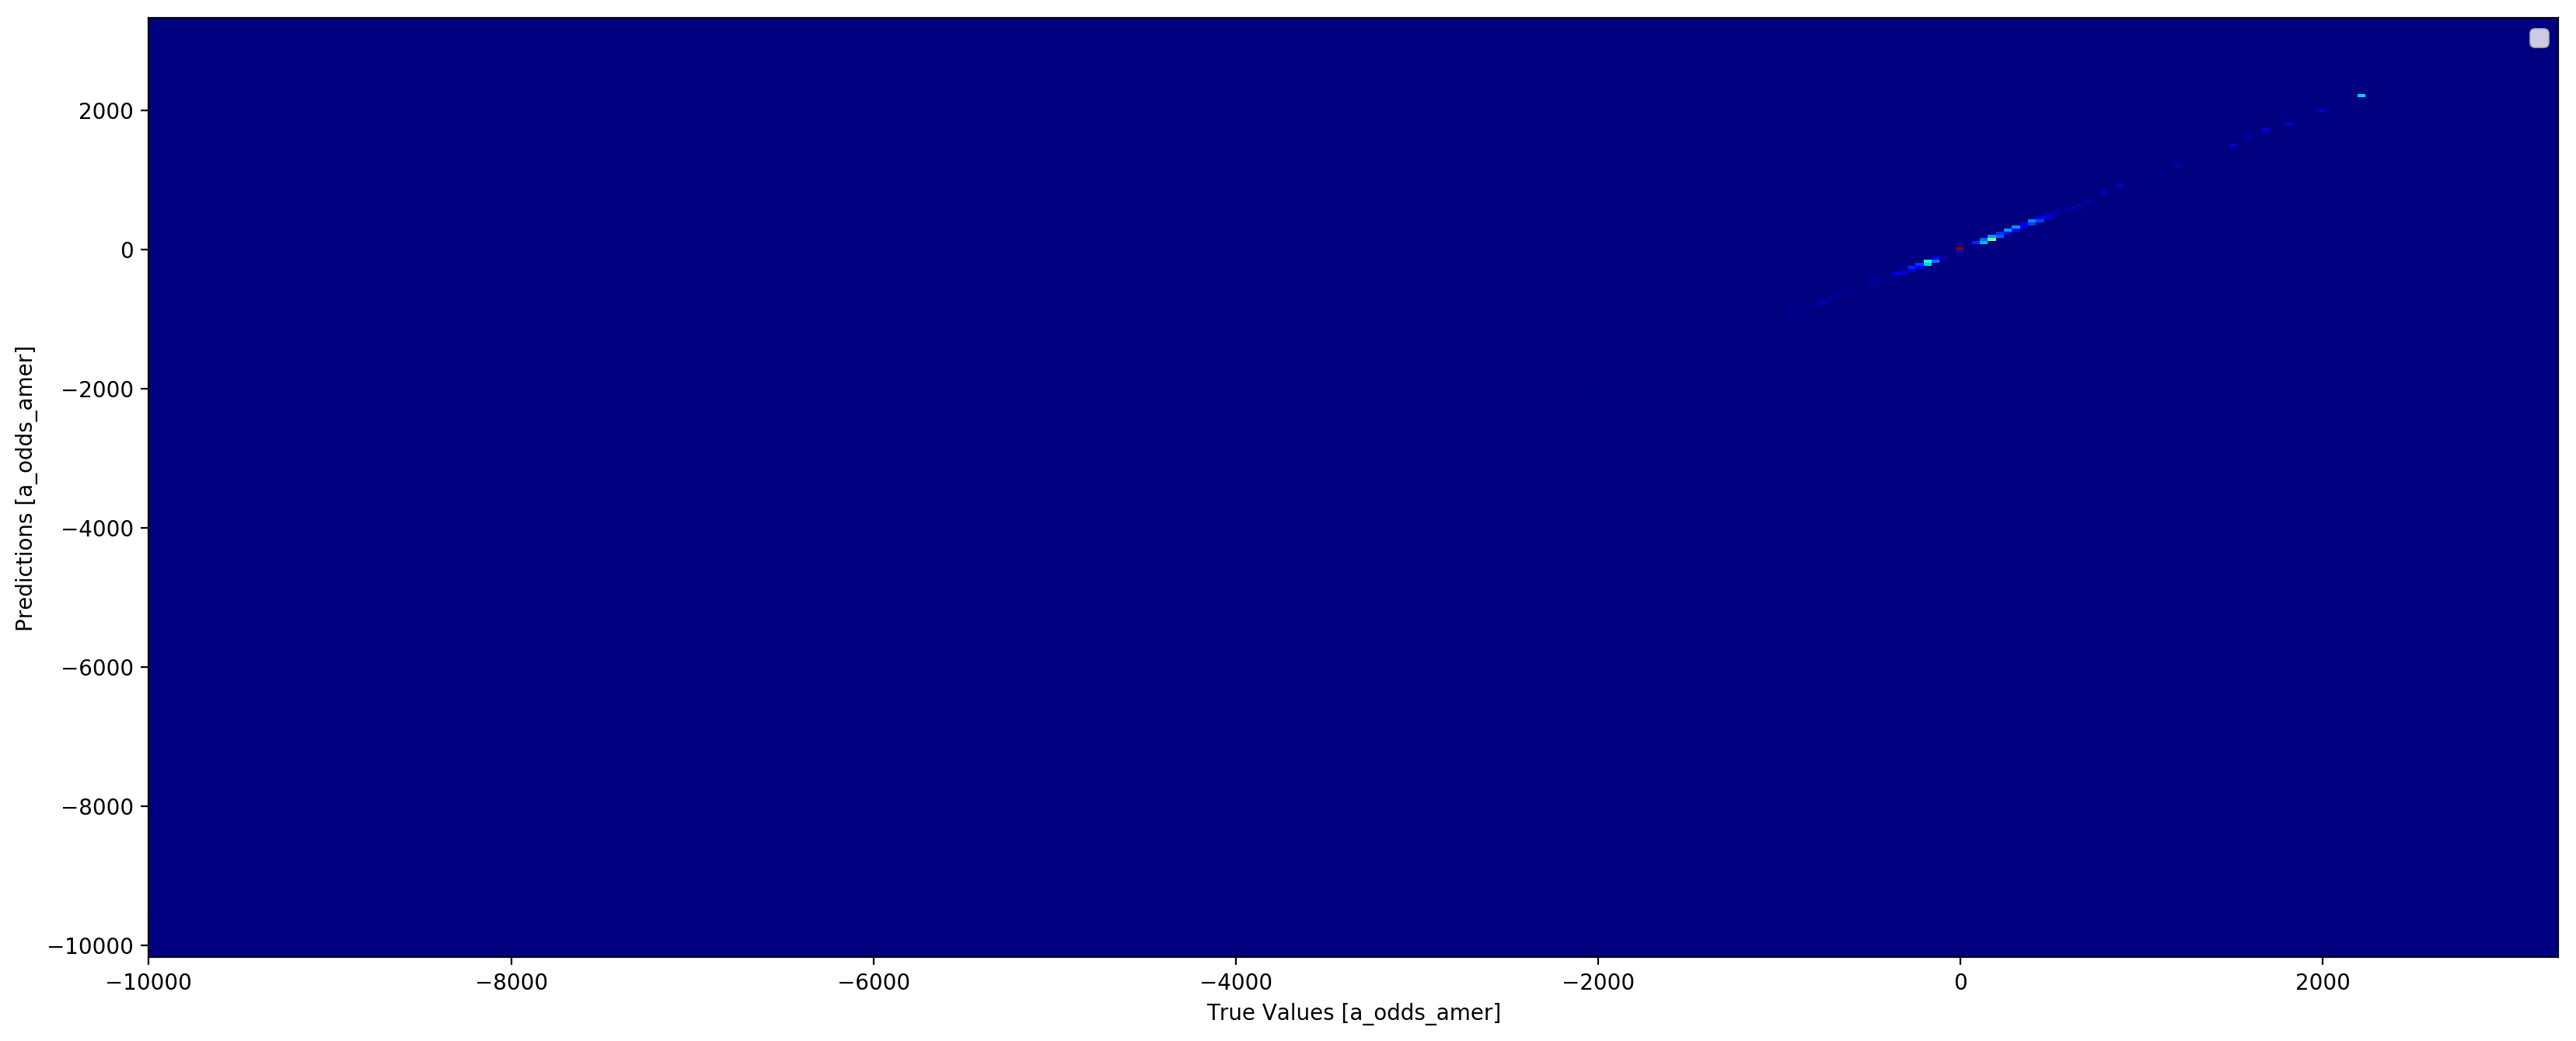

In [112]:
plt.figure(num=None, figsize=(20, 8), dpi=200, facecolor='w', edgecolor='k')

plt.hist2d(yte, test_predictions, bins=(300, 300), cmap=plt.cm.jet, normed=True)
plt.xlabel('True Values [a_odds_amer]')
plt.ylabel('Predictions [a_odds_amer]')
plt.legend()
# # Small bins
# plt.hist2d(x, y, bins=(300, 300), cmap=plt.cm.jet)
# #plt.show()
 
# # If you do not set the same values for X and Y, the bins aren't square !
# plt.hist2d(x, y, bins=(300, 30), cmap=plt.cm.jet)


In [113]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

# fig1 = plt.figure(figsize=(20,8))
ax = fig1.gca(projection='3d')
a = X['a_odds_ml']
b = X.h_odds_ml
c = X.last_mod_to_start

# # a.to_numpy()
# x, y, z = np.meshgrid((np.array(a), np.array(b), np.array(c)))

x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# # Make the direction data for the arrows
# i = 0
# for elt in a:
#     u.concat(x[i+1]/x[i])
#     v.concat(y[i+1]/y[i])
#     w.concat(z[i+1]/z[i])
#     i += 1
# ylim(bottom, top) 
# ax.quiver(x, y, z, length=10000, normalize=True)

# plt.show()

np.array(a)

array([1700, 1700, 1700, ...,    0,    0,    0])

In [114]:
a = X.a_odds_ml
b = X.h_odds_ml
c = X.last_mod_to_start
a[0]

1700

MemoryError: 

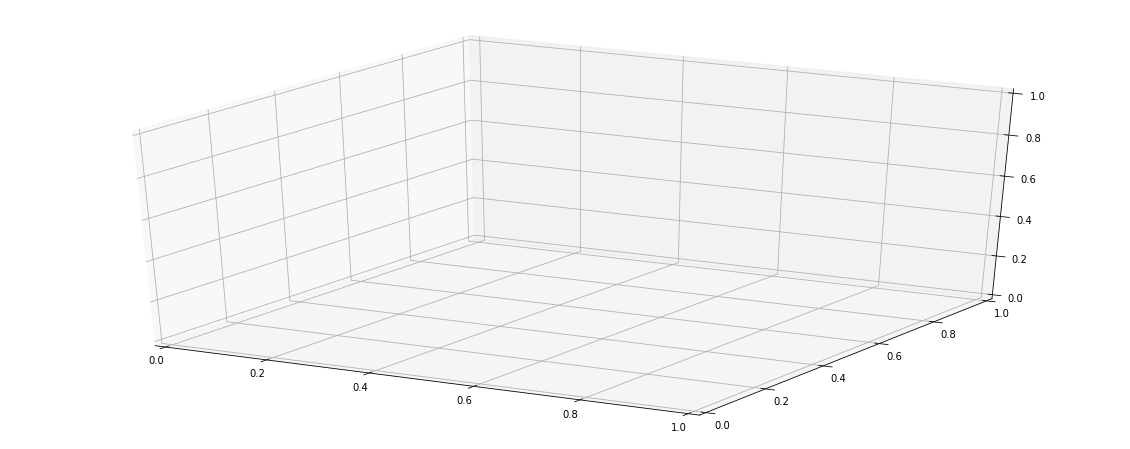

In [115]:

fig1 = plt.figure(figsize=(20,8))
ax = fig1.gca(projection='3d')
a = X.a_odds_ml
b = X.h_odds_ml
c = X.last_mod_to_start
# a
x = a
y = b
R = np.meshgrid(x, y)
z = np.sin(R)
ax.plot_wireframe(x, y, z, rstride=10, cstride=10)

plt.show()

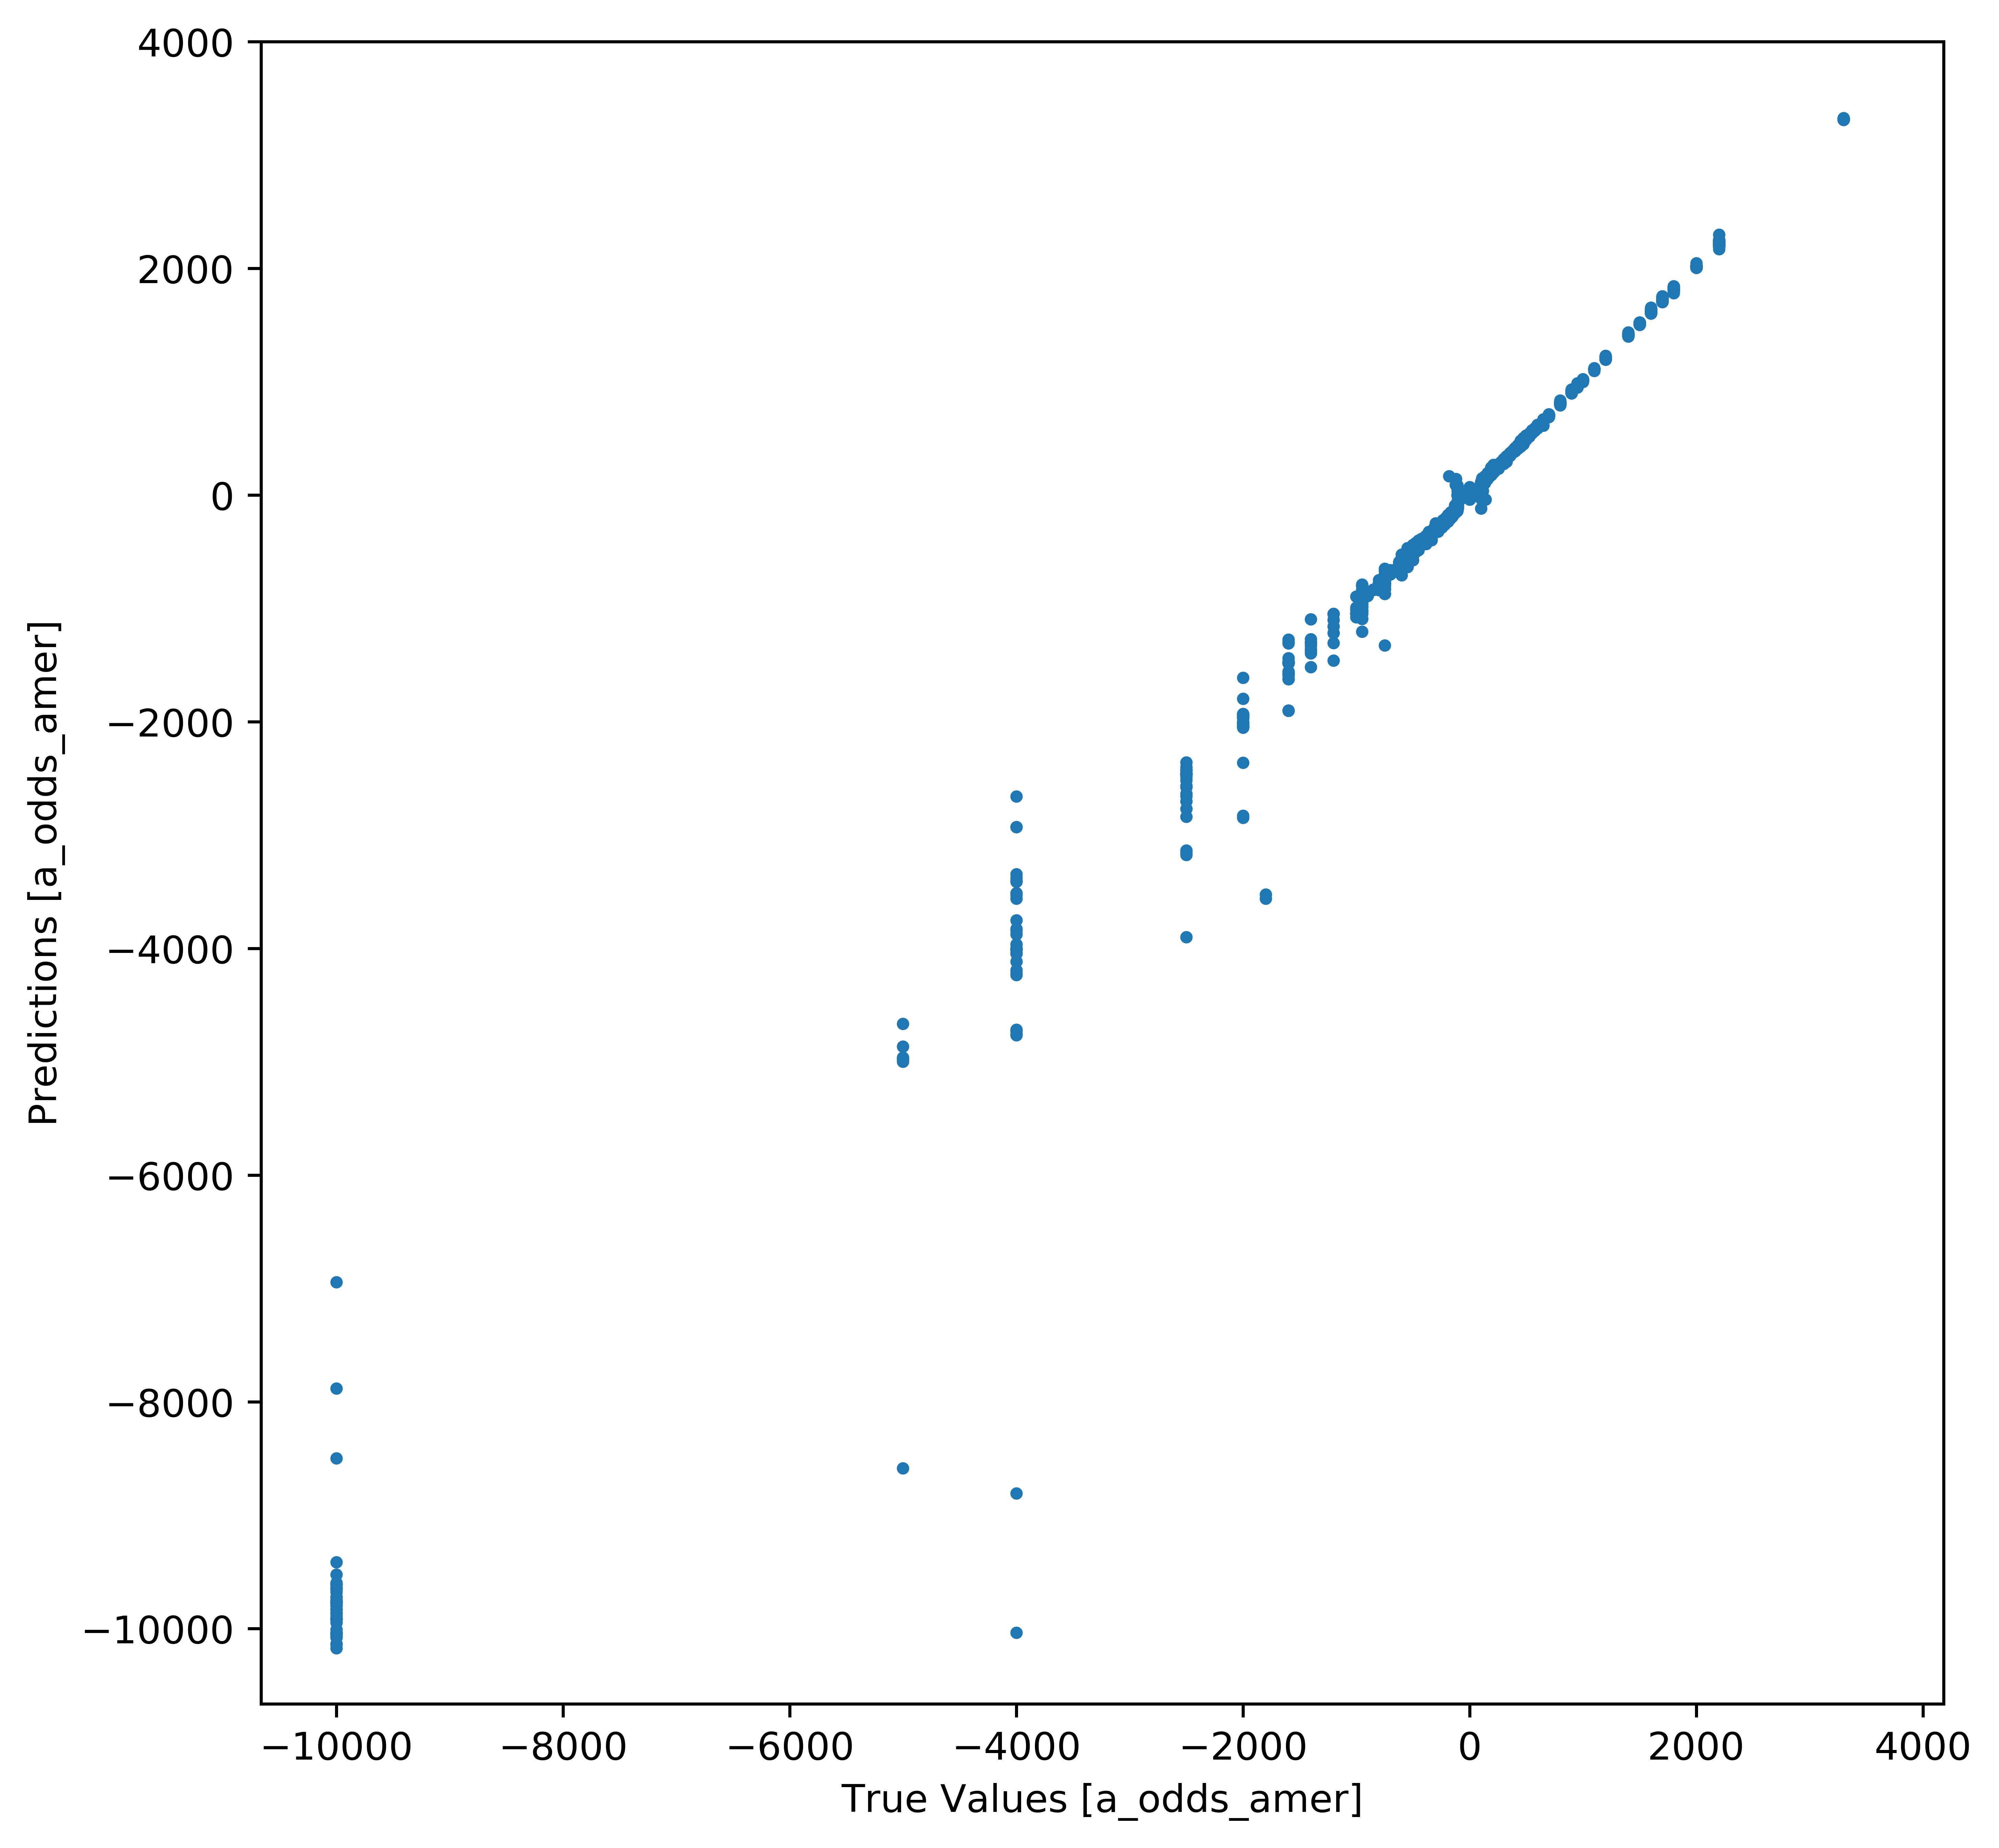

In [120]:
plt.figure(num=None, figsize=(20, 8), dpi=800, facecolor='w', edgecolor='k')

plt.scatter(yte, test_predictions, s=5)
plt.xlabel('True Values [a_odds_amer]')
plt.ylabel('Predictions [a_odds_amer]')
plt.axis('equal')
plt.axis('square')

plt.xlim([plt.xlim()[0],plt.xlim()[1]])
plt.ylim([plt.xlim()[0],plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.savefig("/home/sippycups/Programming/tensorflow/visuals/predict.png")

In [ ]:
# tf.metrics.accuracy(
#     yte,
#     test_predictions,
#     weights=None,
#     metrics_collections=None,
#     updates_collections=None,
#     name=None
# )

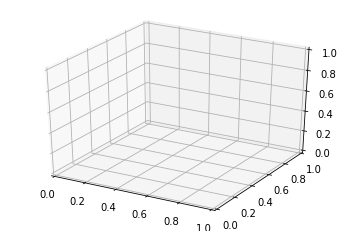

In [141]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource
from matplotlib import cm
z = X['last_mod_to_start']
x = X['a_odds_ml']
y = X['h_odds_ml']
plt.figure(num=None, figsize=(20, 8), dpi=800, facecolor='w', edgecolor='k')
# plt.axis('equal')
# plt.axis('square')

# plt.xlim([plt.xlim()[0],plt.xlim()[1]])
# plt.ylim([plt.xlim()[0],plt.ylim()[1]])
# _ = plt.plot([-100, 100], [-100, 100])
plt.tricontour(x.ravel(), y.ravel(), z.ravel())
# # Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

# ls = LightSource(270, 45)
# # To use a custom hillshading mode, override the built-in shading and pass
# # in the rgb colors of the shaded surface calculated from "shade".
# # rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
# surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, #facecolors=rgb,
#                        linewidth=0, antialiased=False, shade=False)

plt.show()